### Portfolio Optimization

In this notebook, I implemented several portfolio optimization techniques to one of portfolio consisting of 15 stocks.

Thanks to the *Investment Management with Python and Machine Learning* course on Coursera. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
from itertools import cycle

color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
quandl.ApiConfig.api_key = "rGMdjDvZZz8YdrV5ujdN"

### Download the data using Quandl API
>Some tickers given by the csv file is different from the tickers in Quandl, so we need to covert them into the ticker names in Quandl. After downloading the 10-year stock price for each ticker, we export them into a csv file for further use. If there are unavailable data in Quandl, we can get those from Yahoo finance.

In [4]:
# get all the stock tickers we need to acquire
stock_tickers = ['AMT', 'ANSS', 'BRK_A', 'BAM','KMX', 'CLNY', 'CSGP', 'DHR', 'DSGX', 'DLTR', 'MCO', 'ORLY', 'LAMR', 'MKL', 'MA']

In [5]:
start = pd.to_datetime("2009-01-01")
end = pd.to_datetime("2019-03-31")

stock_price = pd.DataFrame()

for ticker in stock_tickers:
    ticker_price = quandl.get(f'EOD/{ticker}.11', start_date = start, end_date = end)
    stock_price = pd.concat([stock_price, ticker_price], axis=1)

stock_price.columns = stock_tickers
stock_price.index = pd.to_datetime(stock_price.index)
stock_price.to_csv('Portfolio.csv')
stock_price.head()

,AMT,ANSS,BRK_A,BAM,KMX,CLNY,CSGP,DHR,DSGX,DLTR,MCO,ORLY,LAMR,MKL,MA
Date,,,,,,,,,,,,,,,
2009-01-02,25.837550,28.74,99990.0,5.394829,8.32,NaN,33.51,20.906424,2.92,14.016667,18.866490,31.43,10.640926,295.90,14.177842
2009-01-05,25.734851,28.81,102600.0,5.702904,8.23,NaN,33.23,20.584508,2.93,13.940000,18.875003,30.64,11.163133,296.25,14.507251
2009-01-06,25.871784,29.08,100090.0,6.217531,8.51,NaN,34.48,20.888339,3.01,13.223333,19.564618,30.21,12.525414,313.90,15.336453
2009-01-07,24.870461,27.54,96490.0,5.993476,8.13,NaN,34.62,20.327699,2.89,13.846667,19.377315,28.88,11.594522,293.75,14.408807
2009-01-08,24.707853,26.48,98700.0,6.193025,8.40,NaN,35.93,20.088975,2.85,13.876667,19.283664,29.14,10.799858,302.05,14.476080


>Once we finish downloading the data, we can simply read in the stock price from the csv file instead of repeating the time-consuming downloading process.

In [7]:
stock_price = pd.read_csv('Portfolio.csv', index_col=0, parse_dates=True)
stock_price.head()

,AMT,ANSS,BRK_A,BAM,KMX,CLNY,CSGP,DHR,DSGX,DLTR,MCO,ORLY,LAMR,MKL,MA
Date,,,,,,,,,,,,,,,
2009-01-02,25.837550,28.74,99990.0,5.394829,8.32,NaN,33.51,20.906424,2.92,14.016667,18.866490,31.43,10.640926,295.90,14.177842
2009-01-05,25.734851,28.81,102600.0,5.702904,8.23,NaN,33.23,20.584508,2.93,13.940000,18.875003,30.64,11.163133,296.25,14.507251
2009-01-06,25.871784,29.08,100090.0,6.217531,8.51,NaN,34.48,20.888339,3.01,13.223333,19.564618,30.21,12.525414,313.90,15.336453
2009-01-07,24.870461,27.54,96490.0,5.993476,8.13,NaN,34.62,20.327699,2.89,13.846667,19.377315,28.88,11.594522,293.75,14.408807
2009-01-08,24.707853,26.48,98700.0,6.193025,8.40,NaN,35.93,20.088975,2.85,13.876667,19.283664,29.14,10.799858,302.05,14.476080


> Get the daily return

In [8]:
daily_ret = stock_price.pct_change(1)
daily_ret.head()

,AMT,ANSS,BRK_A,BAM,KMX,CLNY,CSGP,DHR,DSGX,DLTR,MCO,ORLY,LAMR,MKL,MA
Date,,,,,,,,,,,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,-0.003975,0.002436,0.026103,0.057106,-0.010817,NaN,-0.008356,-0.015398,0.003425,-0.005470,0.000451,-0.025135,0.049075,0.001183,0.023234
2009-01-06,0.005321,0.009372,-0.024464,0.090239,0.034022,NaN,0.037617,0.014760,0.027304,-0.051411,0.036536,-0.014034,0.122034,0.059578,0.057158
2009-01-07,-0.038703,-0.052957,-0.035968,-0.036036,-0.044653,NaN,0.004060,-0.026840,-0.039867,0.047139,-0.009574,-0.044025,-0.074320,-0.064192,-0.060486
2009-01-08,-0.006538,-0.038489,0.022904,0.033294,0.033210,NaN,0.037839,-0.011744,-0.013841,0.002167,-0.004833,0.009003,-0.068538,0.028255,0.004669


> Visualize the returns

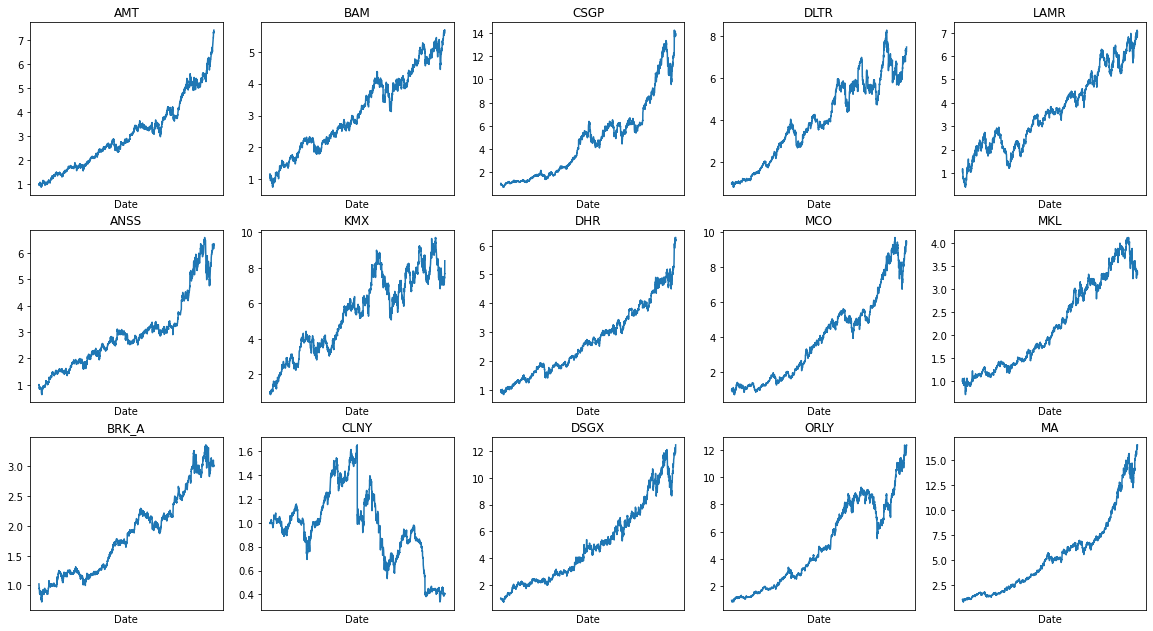

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(20, 12))
ax_row = 0
ax_col = 0
for ticker in daily_ret.columns:
    (1+daily_ret[ticker]).cumprod().plot(title = ticker, ax=axes[ax_row, ax_col])
    axes[ax_row, ax_col].set_xticks([])#get rid of the xticks
    ax_row += 1
    if ((ax_row)%3 == 0):
        ax_col += 1
        ax_row = 0

> Write the functions for calculating expected return, covariance matrix, portfolio return and volatility.

In [11]:
def portfolio_return(w, er):
    return np.dot(w, er)

def portfolio_vol(w, cov):
    return np.sqrt(np.dot(np.dot(np.transpose(w), cov), w))

def get_er(daily_ret):
    return (1+daily_ret).prod()**(1/len(daily_ret))-1

def get_cov(daily_ret):
    return daily_ret.cov()

### Portfolio Optimization
> 1. Construct and plot the efficient frontier

> 2. Use Equally Weighted Portfolio as a benchmark portfolio, and show its position along with the efficient frontier.

> 3. Optimize by applying Markowitz Analysis(Maximizing the portfolio Sharpe Ratio). It tends to put lots of weight on certain assets with higher sharpe ratio and put absolutely no weight on assets with lower sharpe ratio, so you can give each constituent a minimum weight by setting up the _min_weight_ parameter.

> 4. Optimize by applying Global Minimum Variance method to find the portfolio with minimum volatility. Same as before, It will put more weights on assets with low volatility and no weights on assets with higher volatility, so you can give each constituent a minimum weight by setting up the _min_weight_ parameter.

> 5. Create a risk-partiy portfolio by equalizing each constituent's risk contribution to the total portfolio volatility.

> 6. Combine the Global Minimum Variance model with the constant correlation model to mix the model and sample estimates by choosing a shrinkage parameter _delta_ , which I set to 0.5 as the default. 

#### Plot the Efficient Froniter

In [12]:
from scipy.optimize import minimize

In [13]:
# Given a set of target return, minimize the volatility for each of them to construct the efficient frontier
def minimize_vol(target_return, expected_return, cov_matrix):
    n_assets = len(expected_return)
    initial_guess = np.repeat((1/n_assets), n_assets)
    bounds = ((0.0, 1.0), )*n_assets
    return_is_target = {
        'type':'eq',
        'args':(expected_return, ),
        'fun':lambda weights, expected_return: target_return-portfolio_return(weights, expected_return)
    }
    weight_sum_1 = {
        'type':'eq',
        'fun':lambda weights:np.sum(weights)-1
    }
    result = minimize(fun = portfolio_vol, 
                       x0 = initial_guess,
                       args = (cov_matrix,),
                       bounds = bounds,
                       constraints=(return_is_target, weight_sum_1)
                  )
    return result.x

In [14]:
def optimal_weights(n_grids, expected_return, cov_matrix):
    target_rets = np.linspace(expected_return.min(), expected_return.max(), n_grids)
    weights = [minimize_vol(target_return, expected_return, cov_matrix) for target_return in target_rets]
    return weights

def plot_ef(n_grids, daily_ret):
    expected_return = get_er(daily_ret)
    cov_matrix = get_cov(daily_ret)
    weights = optimal_weights(n_grids, expected_return, cov_matrix)
    print('number of target returns:',len(weights))
    print('number of stocks we have:', len(weights[0]))
    #use the weights to calculate portfolio returns (position on y-axis)
    all_returns = [portfolio_return(w, expected_return) for w in weights] 
    #use the weights to calculate portfolio vols (position on x-axis)
    all_vols = [portfolio_vol(w, cov_matrix) for w in weights] 
    efficient_frontier = pd.DataFrame({
        'return':all_returns, 
        'volatility':all_vols
    })
    efficient_frontier.plot(kind='line', x='volatility', y='return', style='b.-', figsize=(12,6), label='efficient frontier')

number of target returns: 50
number of stocks we have: 15


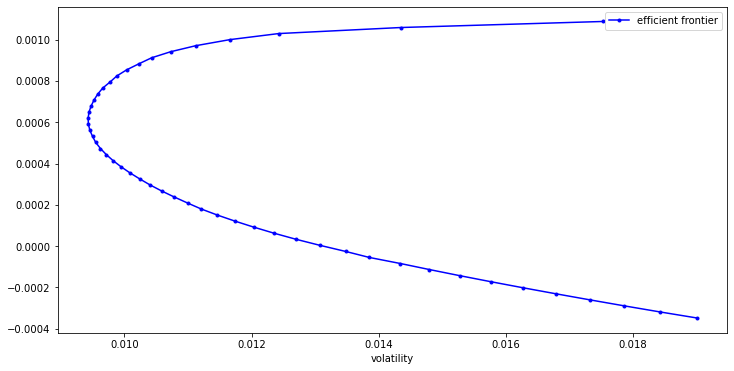

In [15]:
plot_ef(50, daily_ret)

####  Benchmark portfolio (Equally Weighted Portfolio)

In [16]:
def ew(daily_ret):
    n_asset = len(daily_ret.columns)
    return np.repeat((1/n_asset), n_asset)

In [17]:
def plot_ew(n_grids, daily_ret):
    plt.figure(figsize=(12, 7))
    plot_ef(n_grids, daily_ret) #plot the efficient frontier
    ew_result = ew(daily_ret)
    expected_return = get_er(daily_ret)
    cov_mat = get_cov(daily_ret)
    ew_ret = portfolio_return(ew_result, expected_return)
    ew_vol = portfolio_vol(ew_result, cov_mat)
    plt.plot(ew_vol, ew_ret, color='black', marker='x', markersize=12, label='Equally Weighted')
    plt.legend()

number of target returns: 20
number of stocks we have: 15


<Figure size 864x504 with 0 Axes>

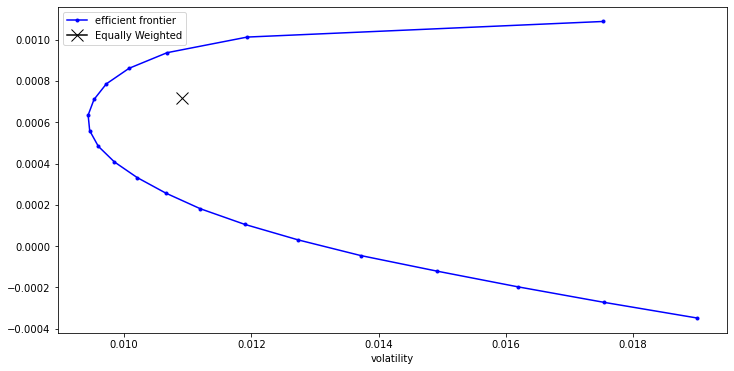

In [18]:
plot_ew(20, daily_ret)

#### Markowitz Analysis(Maximizing Sharpe Ratio of the portfolio)

In [19]:
def neg_SR(weights, risk_free_rate, expected_return, cov_matrix):
    mu = portfolio_return(weights, expected_return)
    sigma = portfolio_vol(weights, cov_matrix)
    neg_sharpe_ratio = -(mu-risk_free_rate)/sigma
    return neg_sharpe_ratio

def maximize_sr(daily_ret, risk_free_rate, min_weight=0.0):
    '''
    risk_free_rate, er, cov --> W
    '''
    expected_return = get_er(daily_ret)
    cov_matrix = get_cov(daily_ret)
    
    n_asset = len(expected_return)
    initial_guess = np.repeat((1/n_asset), n_asset)
    bounds = ((min_weight, 1),)*n_asset
    
    weight_sum_1 = {
        'type':'eq',
        'fun':lambda weights: np.sum(weights)-1
    }
    
    result = minimize(fun = neg_SR,
                        x0 = initial_guess,
                        method = 'SLSQP',
                        args=(risk_free_rate,expected_return, cov_matrix,),
                        constraints = (weight_sum_1),
                        bounds = bounds
                      )
    return result

In [20]:
def plot_msr(n_grids, daily_ret, risk_free_rate=0.0, min_weight=0.0):
    expected_return = get_er(daily_ret)
    cov_matrix = get_cov(daily_ret)
    rf = risk_free_rate
    min_weight = min_weight
    plt.figure(figsize=(12,7))
    plot_ef(n_grids, daily_ret)
    result = maximize_sr(daily_ret, rf, min_weight)
    print(f'Portfolio annualized sharpe ratio: {np.sqrt(252)*(-result.fun)}')
    msr_ret = portfolio_return(result.x, expected_return)
    msr_vol = portfolio_vol(result.x, cov_matrix)
    plt.plot(msr_vol, msr_ret, 'r*', markersize=12, label='MSR')
    plt.legend()

number of target returns: 20
number of stocks we have: 15
Portfolio annualized sharpe ratio: 1.3956134167151817


<Figure size 864x504 with 0 Axes>

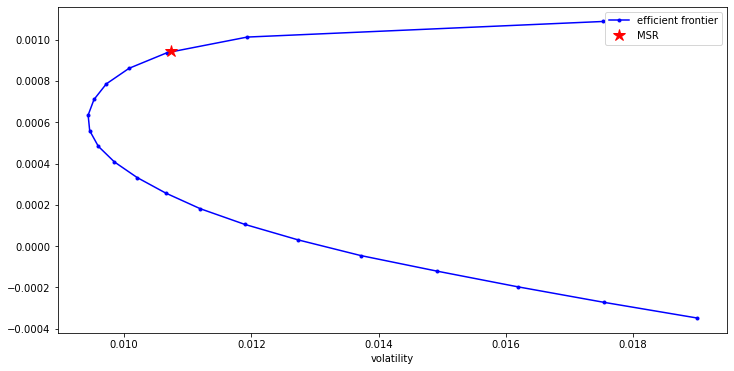

In [21]:
plot_msr(20, daily_ret)

#### Global Minimum Variance Portfolio

In [22]:
def gmv(daily_ret, min_weight=0.0):
    cov_matrix = get_cov(daily_ret)
    
    n_asset = len(cov_matrix)
    initial_guess = np.repeat((1/n_asset), n_asset)
    bounds = ((min_weight, 1.0),)*n_asset
    weight_sum_1 = {
        'type':'eq',
        'fun':lambda weight: np.sum(weight)-1
    }
    result = minimize(fun = portfolio_vol,
                      x0 = initial_guess,
                      args = (cov_matrix,),
                      method = 'SLSQP',
                      bounds = bounds,
                      constraints = (weight_sum_1)
                     )
    return result

In [23]:
def plot_msr_gmv(n_grids, daily_ret, risk_free_rate=0.0, min_weight=0.0):
    plt.figure(figsize=(12,7))
    plot_ef(n_grids, daily_ret)
    expected_return = get_er(daily_ret)
    cov_matrix = get_cov(daily_ret)
    rf = risk_free_rate
    min_weight = min_weight
    
    msr = maximize_sr(daily_ret, rf, min_weight)
    print(f'Portfolio annualized sharpe ratio: {np.sqrt(252)*(-msr.fun)}')
    msr_ret = portfolio_return(msr.x, expected_return)
    msr_vol = portfolio_vol(msr.x, cov_matrix)
    plt.plot(msr_vol, msr_ret, 'r*', markersize=12, label='Max Sharpe Ratio')
    
    gmv_result = gmv(daily_ret, min_weight)
    gmv_ret = portfolio_return(gmv_result.x, expected_return)
    gmv_vol = portfolio_vol(gmv_result.x, cov_matrix)
    plt.plot(gmv_vol, gmv_ret, 'go', markersize=12, label='Min Volatility')
    plt.legend()

number of target returns: 20
number of stocks we have: 15
Portfolio annualized sharpe ratio: 1.3956134167151817


<Figure size 864x504 with 0 Axes>

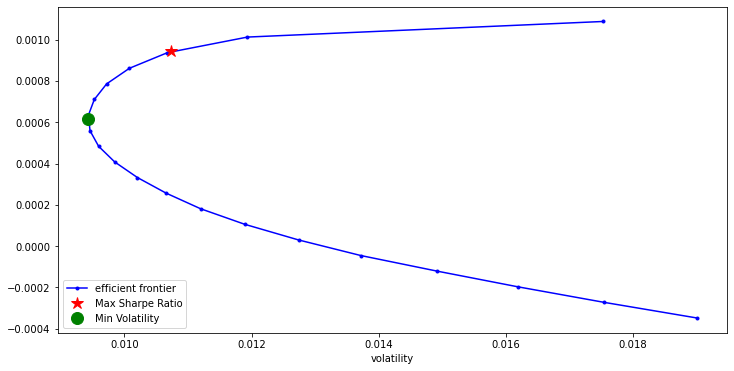

In [24]:
plot_msr_gmv(20, daily_ret)

#### Risk Parity Portfolio (Equalize asset's risk contribution to the total portfolio's risk contribution)

In [25]:
def risk_contribution(weights,cov_matrix):
    """
    Compute the contributions to risk of the constituents of a portfolio, 
    given a set of portfolio weights and a covariance matrix
    """
    total_portfolio_var = portfolio_vol(weights,cov_matrix)**2
    # Marginal contribution of each constituent
    marginal_contrib = cov_matrix.dot(weights)
    # print(np.multiply(marginal_contrib, weights))
    risk_contrib = np.multiply(marginal_contrib, weights)/total_portfolio_var
    return risk_contrib

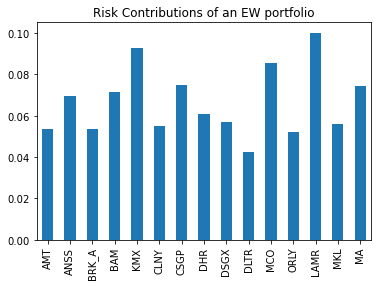

In [26]:
risk_contribution(ew(daily_ret), get_cov(daily_ret)).plot.bar(title="Risk Contributions of an EW portfolio");

In [27]:
def ssd_risk(weights, target_contribs, cov_matrix):
    """
    Returns the Sum of Squared Difference in risk contributions between weighted risk and target_risk
    """
    w_contribs = risk_contribution(weights, cov_matrix)
    return ((w_contribs-target_contribs)**2).sum()
    
def target_risk_contributions(target_contribs, cov_matrix):
    """
    Returns the weights of the portfolio that gives you the weights such
    that the contributions to portfolio risk are as close as possible to
    the target_risk, given the covariance matrix
    """
    n = cov_matrix.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_1 = {'type': 'eq',
                    'fun': lambda weights: np.sum(weights) - 1
    }
    
    result = minimize(ssd_risk, 
                      init_guess,
                      args=(target_contribs, cov_matrix), 
                      method='SLSQP',
                      constraints=(weights_sum_1,),
                      bounds=bounds)
    return result

def risk_parity(daily_ret):
    """
    Returns the weights of the portfolio that equalizes the contributions
    of the constituents based on the given covariance matrix
    """
    cov_matrix = get_cov(daily_ret)
    n = cov_matrix.shape[0]
    return target_risk_contributions(target_contribs=np.repeat(1/n,n), cov_matrix=cov_matrix)

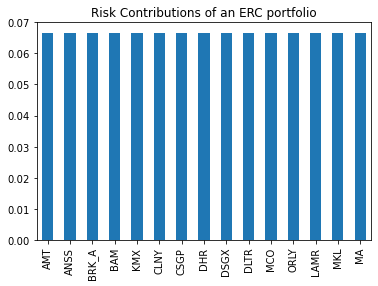

In [28]:
risk_contribution(risk_parity(daily_ret).x, get_cov(daily_ret)).plot.bar(title="Risk Contributions of an ERC portfolio");

#### Global Mimumim Variance Portfolio (with Constant Correlation model)
> We apply GMV again, but this time with a more robust covariance matrix based on constant correlation model. The idea is simple, take the sample correlation matrix, compute the average correlation and then reconstruct the covariance matrix.

In [29]:
def cc_cov(ret):
    """
    Estimates a covariance matrix by using the Constant Correlation model
    """
    rhos = ret.corr()
    n = rhos.shape[0]
    # calculate the mean correlation, and use it to build the covariance matrix
    rho_bar = (rhos.values.sum()-n)/(n**2-n)
    ccor = np.full_like(rhos, rho_bar)
    np.fill_diagonal(ccor, 1.)
    sd = ret.std()
    ccov = ccor * np.outer(sd, sd)
    return pd.DataFrame(ccov, index=ret.columns, columns=ret.columns)

In [30]:
def shrinkage_cov(ret, delta=0.5):
    """
    Covariance estimator that shrinks between the Sample Covariance matrix and the Constant Correlation model-based matrix
    """
    prior = cc_cov(ret)
    sample = ret.cov()
    return delta*prior + (1-delta)*sample

In [31]:
def gmv_cc(daily_ret, delta=0.5, min_weight=0.0):
    cov_matrix = shrinkage_cov(daily_ret, delta)
    n_asset = len(cov_matrix)
    initial_guess = np.repeat((1/n_asset), n_asset)
    bounds = ((min_weight, 1.0),)*n_asset
    weight_sum_1 = {
        'type':'eq',
        'fun':lambda weight: np.sum(weight)-1
    }
    result = minimize(fun = portfolio_vol,
                      x0 = initial_guess,
                      args = (cov_matrix,),
                      method = 'SLSQP',
                      bounds = bounds,
                      constraints = (weight_sum_1)
                     )
    return result

#### Plot all the optimized results along with the efficient frontier.

In [32]:
def plot_all(n_grids, daily_ret, risk_free_rate=0.0, min_weight=0.0, delta=0.5):
    plt.figure(figsize=(12,7))
    plot_ef(n_grids, daily_ret)
    rf = risk_free_rate
    min_weight = min_weight
    expected_return = get_er(daily_ret)
    cov_matrix = get_cov(daily_ret)
    
    # Maximize Sharpe Ratio
    msr = maximize_sr(daily_ret, rf, min_weight)
    print(f'Miximized Sharpe Ratio Portfolio annualized sharpe ratio: {np.sqrt(252)*(-msr.fun)}')
    msr_ret = portfolio_return(msr.x, expected_return)
    msr_vol = portfolio_vol(msr.x, cov_matrix)
    plt.plot(msr_vol, msr_ret, 'r*', markersize=12, label='Max Sharpe Ratio')
    
    # Global Minimum Volatility
    gmv_result = gmv(daily_ret, min_weight)
    gmv_ret = portfolio_return(gmv_result.x, expected_return)
    gmv_vol = portfolio_vol(gmv_result.x, cov_matrix)
    plt.plot(gmv_vol, gmv_ret, 'go', markersize=12, label='Min Volatility')
    
    # Equally weighted 
    ew_result = ew(daily_ret)
    ew_ret = portfolio_return(ew_result, expected_return)
    ew_vol = portfolio_vol(ew_result, cov_matrix)
    plt.plot(ew_vol, ew_ret, color='black', marker='x', markersize=12, label='Equally Weighted')
    
    # Risk Parity Portfolio (ERC)
    rp_result = risk_parity(daily_ret)
    rp_ret = portfolio_return(rp_result.x, expected_return)
    rp_vol = portfolio_vol(rp_result.x, cov_matrix)
    plt.plot(rp_vol, rp_ret, color='orange', marker='+', markersize=12, label='Risk Parity')
    
    # Global Minimum Volatility with constant correlation assumption
    gmv_cc_result = gmv_cc(daily_ret, delta, min_weight)
    gmv_cc_ret = portfolio_return(gmv_cc_result.x, expected_return)
    gmv_cc_vol = portfolio_vol(gmv_cc_result.x, cov_matrix)
    plt.plot(gmv_cc_vol, gmv_cc_ret, color='purple', marker='^', markersize=12, label='Min volatility(CC)')
    
    plt.legend()

number of target returns: 20
number of stocks we have: 15
Miximized Sharpe Ratio Portfolio annualized sharpe ratio: 1.3956134167151817


<Figure size 864x504 with 0 Axes>

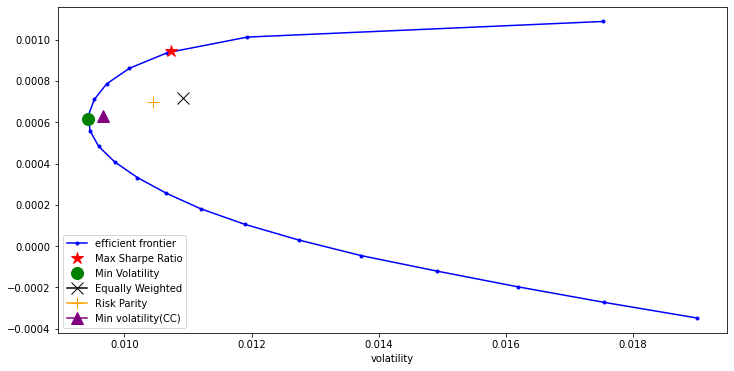

In [33]:
plot_all(20, daily_ret)

#### Show the optimized weights

In [34]:
def optimized_weights(daily_ret, risk_free_rate=0.0, min_weight=0.0, delta=0.5):
    rf = risk_free_rate
    min_weight = min_weight
    #MSR
    msr_result = maximize_sr(daily_ret, rf, min_weight)
    msr_weights = pd.Series((msr_result.x).round(3))
    #GMV
    gmv_result = gmv(daily_ret, min_weight)
    gmv_weights = pd.Series((gmv_result.x).round(3))
    #EW
    ew_result = ew(daily_ret)
    ew_weights = pd.Series(ew_result)
    #ERC
    erc_result = risk_parity(daily_ret)
    erc_weights = pd.Series((erc_result.x).round(3))
    #GMV(Constant Correlation shrinkage)
    gmv_cc_result = gmv_cc(daily_ret, delta, min_weight)
    gmv_cc_weights = pd.Series((gmv_cc_result.x).round(3))
    #concatnate weights to dataframe
    df_weights = pd.concat([msr_weights, gmv_weights, ew_weights, erc_weights, gmv_cc_weights], axis=1)
    df_weights.index = stock_tickers
    df_weights.columns = ['msr', 'gmv', 'ew', 'erc', 'gmv(cc)']
    return df_weights

In [36]:
# set the min_weight to 0.005 to make sure every asset has some weight instead of zero.
optimized_weights(daily_ret, 0.0)

,msr,gmv,ew,erc,gmv(cc)
AMT,0.163,0.151,0.066667,0.078,0.169
ANSS,0.000,0.003,0.066667,0.062,0.023
BRK_A,0.000,0.191,0.066667,0.079,0.237
BAM,0.000,0.000,0.066667,0.060,0.023
KMX,0.000,0.000,0.066667,0.047,0.000
CLNY,0.000,0.074,0.066667,0.075,0.028
CSGP,0.114,0.000,0.066667,0.058,0.000
DHR,0.000,0.108,0.066667,0.070,0.167
DSGX,0.149,0.084,0.066667,0.073,0.011
DLTR,0.142,0.150,0.066667,0.091,0.116


>You can tune the parameter _min_weight_ to get a more diversified portfolio, or tune the shrinkage parameter _delta_ to based on the reliability of model and sample.

### Backtesting
> Rolling window = 252 days.

In [37]:
def backtest(r, weighting_scheme, estimation_window=252, risk_free_rate=0.0, min_weight=0.0, delta=0.5):
    rf = risk_free_rate
    n_period = len(r)
    weights = pd.DataFrame(np.zeros((r.iloc[estimation_window:].shape[0], len(r.columns))), index=r.iloc[estimation_window:].index, columns=r.columns)
    for i in range(1, n_period-estimation_window):
        win = (i, i+estimation_window)
        win_r = r.iloc[win[0]:win[1]]
        
        invalid_cols = win_r.columns[win_r.isnull().any()].tolist() #columns with NaN values, remove it from current asset combination
        valid_cols = win_r.columns.drop(invalid_cols) #valid columns
        
        win_r = win_r[valid_cols]
        weights.iloc[i][invalid_cols] = 0.0

        if weighting_scheme == 'MSR':
            result = maximize_sr(win_r, rf, min_weight)
            result_w = (result.x).round(3)
            weights.iloc[i][valid_cols] = result_w
        elif weighting_scheme == 'GMV':
            result = gmv(win_r, min_weight)
            result_w = (result.x).round(3)
            weights.iloc[i][valid_cols] = result_w
        elif weighting_scheme == 'EW':
            result_w = ew(win_r)
            weights.iloc[i][valid_cols] = result_w
        elif weighting_scheme == 'ERC':
            result = risk_parity(win_r)
            result_w = (result.x).round(3)
            weights.iloc[i][valid_cols] = result_w
        elif weighting_scheme == 'GMV(CC)':
            result = gmv_cc(win_r, delta, min_weight)
            result_w = (result.x).round(3)
            weights.iloc[i][valid_cols] = result_w
        else:
            print("Enter the correct weighting scheme")
#    print(weights['2017'].head())
    returns = (weights * r).sum(axis=1)
    return returns

In [38]:
msr_test = backtest(daily_ret, 'MSR')
gmv_test = backtest(daily_ret, 'GMV')
ew_test = backtest(daily_ret, 'EW')
erc_test = backtest(daily_ret, 'ERC')
gmv_cc_test = backtest(daily_ret, 'GMV(CC)')

In [39]:
def plot_trend():
    btr = pd.DataFrame({'GMV':gmv_test,'MSR':msr_test,'EW':ew_test,'ERC':erc_test,'GMV(CC)':gmv_cc_test})
    (1+btr).cumprod().plot(figsize=(20,8), title='Backtest Result')
    return btr

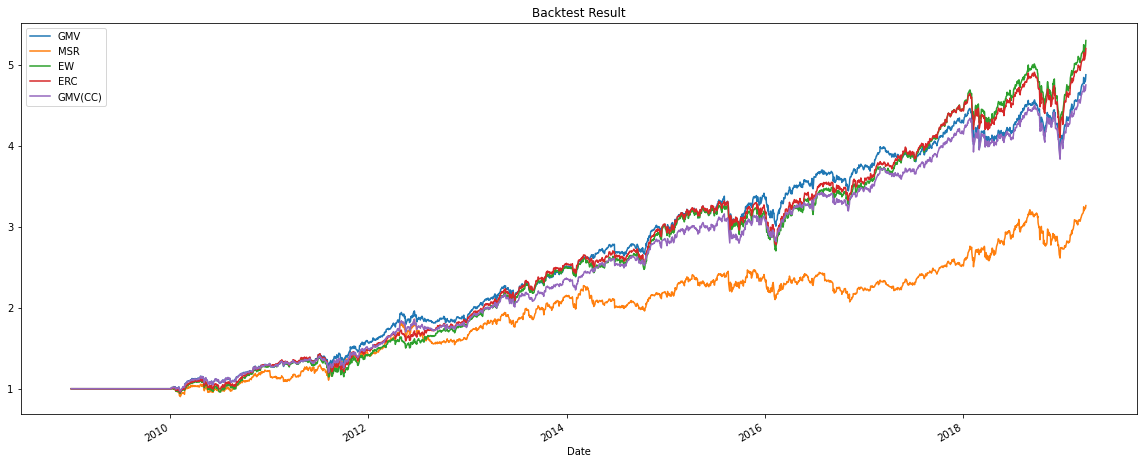

In [40]:
backtest_result = plot_trend()

In [41]:
def sharpe_ratio(r, risk_free_rate=0.0, periods_per_year=252):
    # convert the annual riskfree rate to per period
    rf_per_period = (1+risk_free_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = (1+excess_ret).prod()**(periods_per_year/len(r))-1
    ann_vol = r.std()*np.sqrt(periods_per_year)
    return ann_ex_ret/ann_vol

def annual_ret(r, periods_per_year):
    ann_ex_ret = (1+r).prod()**(periods_per_year/len(r))-1
    return ann_ex_ret

def annual_vol(r, periods_per_year):
    ann_vol = r.std()*np.sqrt(periods_per_year)
    return ann_vol

def max_drawdown(r):
    wealth_index = 1000*(1+r).cumprod()
    peak_wealth = wealth_index.cummax()
    drawdown = (wealth_index-peak_wealth)/peak_wealth
    return drawdown.min()

In [42]:
def summary_stats(backtest_ret, risk_free_rate=0.0, periods_per_year=252):
    """
    Return a DataFrame that contains aggregated summary stats for the returns in the columns of r
    """
    ann_r = backtest_ret.aggregate(annual_ret, periods_per_year=periods_per_year)
    ann_vol = backtest_ret.aggregate(annual_vol, periods_per_year=periods_per_year)
    ann_sr = backtest_ret.aggregate(sharpe_ratio, risk_free_rate=risk_free_rate, periods_per_year=periods_per_year)
    max_dd = backtest_ret.aggregate(max_drawdown)
    return pd.DataFrame({
        "Annualized Return": ann_r,
        "Annualized Vol": ann_vol,
        "Sharpe Ratio": ann_sr,
        "Max Drawdown": max_dd
    })

In [43]:
summary_stats(backtest_result)

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
GMV,0.167534,0.133833,1.251821,-0.146607
MSR,0.122494,0.162662,0.753059,-0.185694
EW,0.177052,0.150082,1.179699,-0.177901
ERC,0.174898,0.143675,1.217317,-0.167068
GMV(CC),0.164552,0.133786,1.229970,-0.148221


> For this optimization, we can see each that each portfolio has its own advantage. It seems like the portfolio with maximum Sharpe Ratio has the worst performance, which has the lowest return and sharpe ratio, and the highest volatility. The equally-weighted portfolio has the most annualized return, but it comes with a relatively high volatility and drawdown. The portfolios with minimum volatility do not bring the highest return, but they have the lowest volatility and drawdown, and excellent sharpe ratio. The risk-parity portfolio has a well-balanced performance, it has the second highest return and sharpe ratio, and relatively low volatility.